# DAY 17
### Heat Map
### Cluster Map
### LM plot
### Reg PLot

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
## List of Built indatasets
sns.get_dataset_names()

C:\Users\kumeg\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\kumeg\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
t = sns.load_dataset("tips")
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heat Map
- it visualize matrix like data.
- it is only applicable for numerical dataset.
    - sns.heatmap()

In [4]:
sns.heatmap(t)
## error :beacuse dataset contains object data

TypeError: '<=' not supported between instances of 'float' and 'str'

In [5]:
t.iloc[:,[0,1,-1]]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


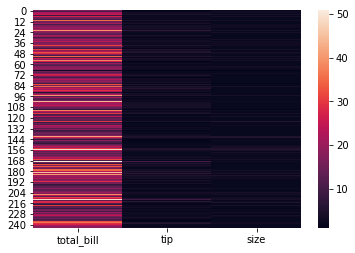

In [6]:
sns.heatmap(t.iloc[:,[0,1,-1]])

In [7]:
t.shape

(244, 7)

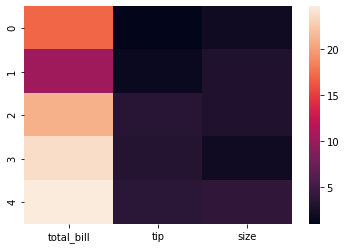

In [9]:
sns.heatmap(t.iloc[:,[0,1,-1]].head())

In [10]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

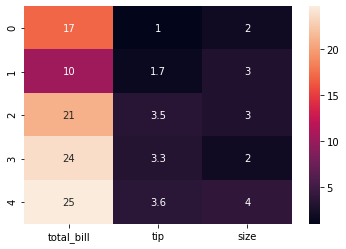

In [11]:
sns.heatmap(t.iloc[:,[0,1,-1]].head(),annot=True)

In [12]:
t.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


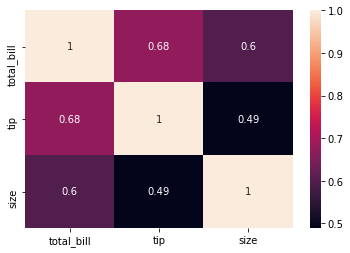

In [15]:
sns.heatmap(t.corr(),annot=True)

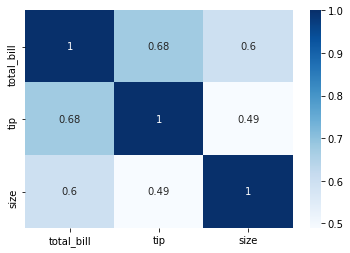

In [16]:
sns.heatmap(t.corr(),annot=True,cmap='Blues')

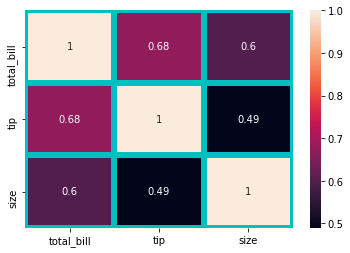

In [22]:
sns.heatmap(t.corr(),annot=True,linewidth=5,linecolor='c')

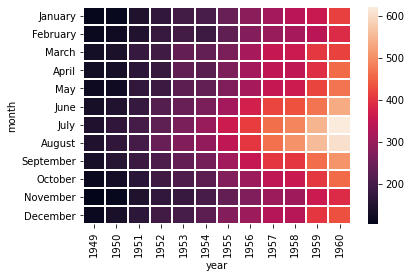

In [28]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights,linewidth=1)
ax

## Cluster Map
- It plots hierarchally clustered heat map
    - sns.clustermap()

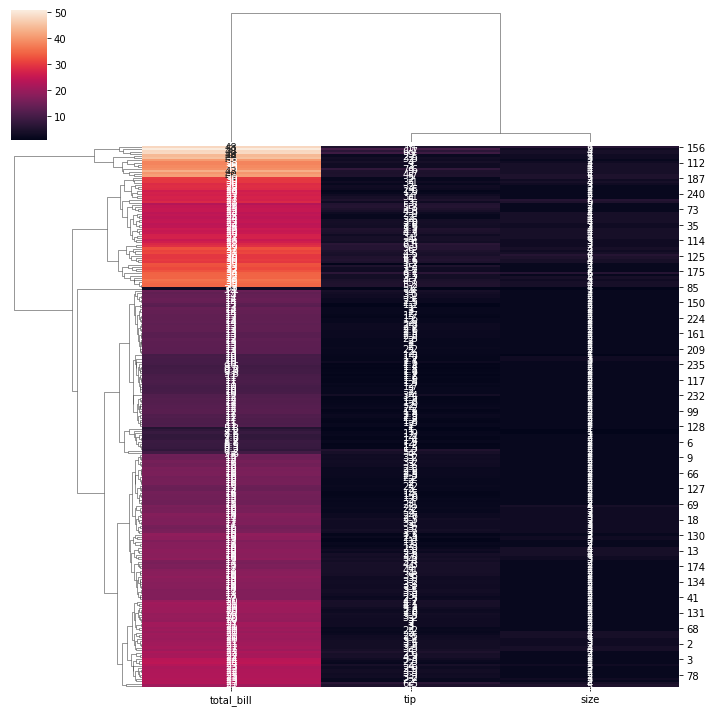

In [33]:
sns.clustermap(t.iloc[:,[0,1,-1]],annot=True)

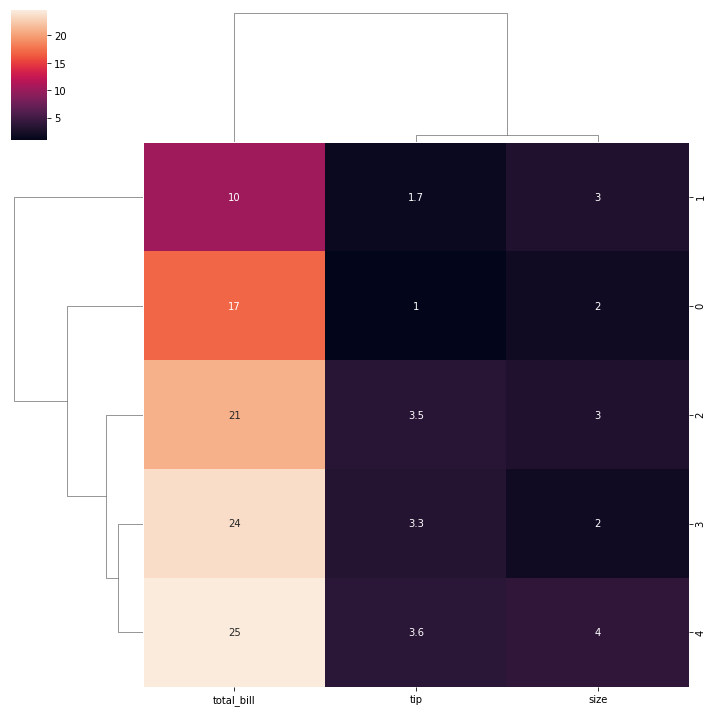

In [30]:
sns.clustermap(t.iloc[:,[0,1,-1]].head(),annot=True)

In [34]:
t.iloc[:,[0,1,-1]].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [35]:
# 1 --> 10.3 + 1 + 3 = 14
# 0 -->              = 20
# 2 -->              = 27
# 3 -->              = 28
# 4 -->              = 31

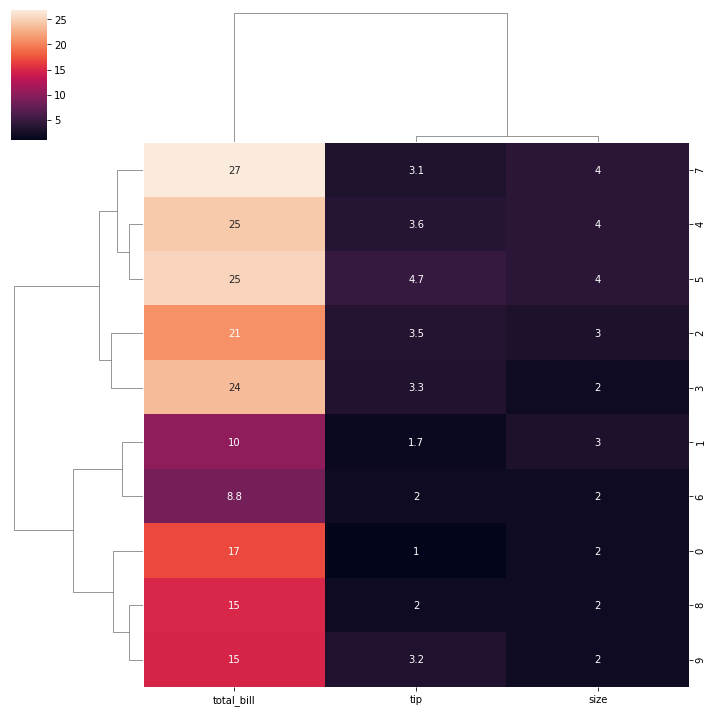

In [36]:
sns.clustermap(t.iloc[:,[0,1,-1]].head(10),annot=True)

In [ ]:
# 7 --> 26 + 3 + 4 = 33     clust 1
-------------------------
# 4 -->              = 31
# 5 -->              = 33   clust 2
-------------------------
# clust 1 + clust 2


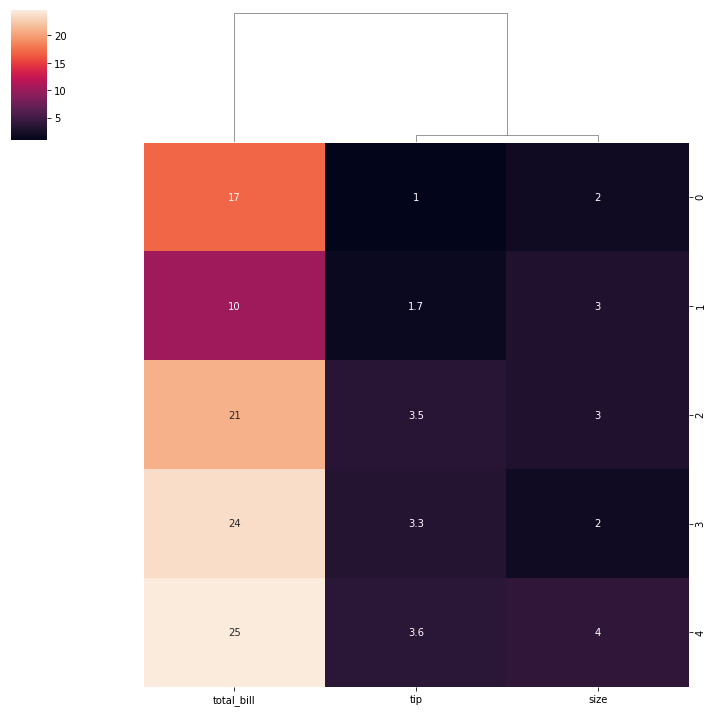

In [38]:
sns.clustermap(t.iloc[:,[0,1,-1]].head(),annot=True,row_cluster=False)

In [39]:
help(sns.clustermap)

Help on function clustermap in module seaborn.matrix:

clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data: 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters.
        See scipy.cluster.hierarchy.linkage documentation for more information:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.lin

## LM Plot
- It is combination of scatter and line plot(regression plot)
    - sns.lmplot()

In [40]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


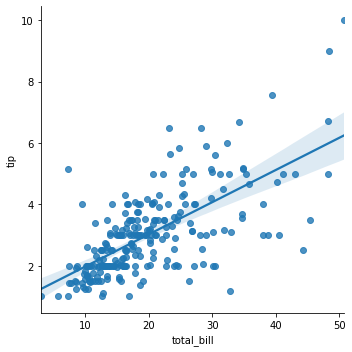

In [41]:
sns.lmplot(x="total_bill",y="tip",data=t)

In [42]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``

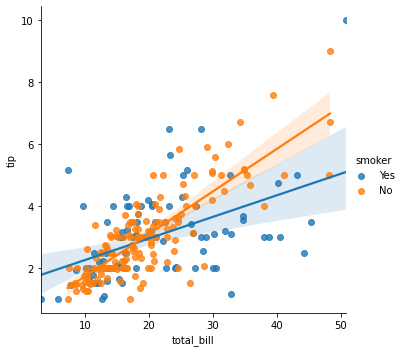

In [43]:
sns.lmplot(x="total_bill",y="tip",data=t,hue='smoker')

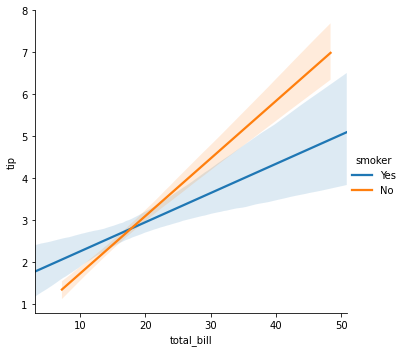

In [44]:
sns.lmplot(x = "total_bill",y = 'tip', data = t, hue = 'smoker', scatter = False)

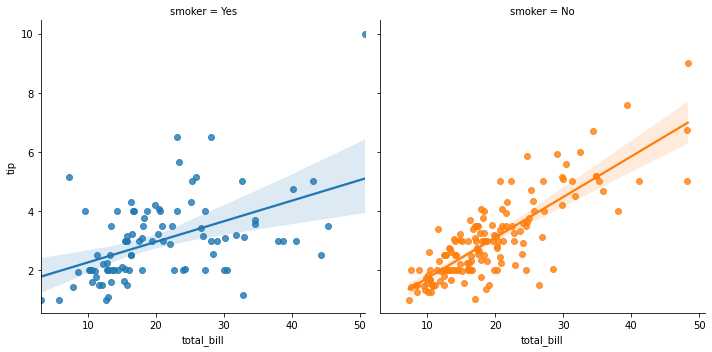

In [45]:
sns.lmplot(x = "total_bill",y = 'tip', data = t, hue = 'smoker',col = 'smoker')

## Regression Plot
- Similar to LM Plot
    - sns.regplot()

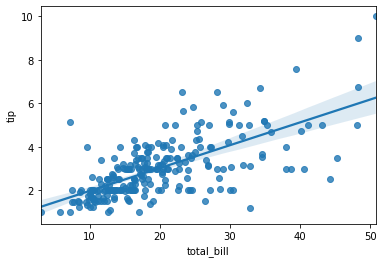

In [46]:
sns.regplot(x = "total_bill",y = 'tip', data = t)

In [47]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable a

## Try to execute regplot examples availabe in help()
### Datasets Websites:
- Kaggle, UGCI Machine Learning Repository, data.gov, Google Dataset Search...